In [47]:
import numpy as np
import pickle
import h5py
from scipy.sparse import csr_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [48]:
def topk_values(array, topk):
    temp_mat = np.zeros(len(array))
    topk = min(topk, np.count_nonzero(array > 0))
    temp_mat[np.argpartition(array, -topk)[-topk:]] = 1
    return temp_mat

def topk_per_row(matrix, topk):
    temp_mat = np.apply_along_axis(topk_values, 1, matrix, topk)
    return temp_mat

In [49]:
depth = 20
recipe_threshold = 2000
ingred_threshold = 700
label_threshold = 10
label_topk = 5

In [50]:
h5f_train = h5py.File('./Container/train', 'r')
train_features = h5f_train['features_boolean'][:]
train_labels = h5f_train['labels_one_hot'][:]
h5f_train.close()

In [51]:
h5f_valid = h5py.File('./Container/valid_clf', 'r')
valid_features = h5f_valid['features_clf'][:]
answer = h5f_valid['labels_int_enc'][:]
h5f_valid.close()

In [52]:
recipe_num, ingred_num = train_features.shape
_, label_num = train_labels.shape

1 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.06171097254542425	micro_f1: 0.04472477064220184	acc: 0.04472477064220184	MAP: 0.6277437988447117	recall: 0.8529561671763507	recall_rank: 1.8571855392889154
depth:2	macro_f1: 0.06133804390635962	micro_f1: 0.0445973496432212	acc: 0.0445973496432212	MAP: 0.6277544172612934	recall: 0.8529561671763507	recall_rank: 1.8570361517777114
depth:3	macro_f1: 0.07021034574064869	micro_f1: 0.060142711518858305	acc: 0.060142711518858305	MAP: 0.5628907577302051	recall: 0.7850407747196738	recall_rank: 1.988800519396202
depth:4	macro_f1: 0.06988168003676302	micro_f1: 0.059887869520897044	acc: 0.059887869520897044	MAP: 0.5626911314984689	recall: 0.7846585117227319	recall_rank: 1.9883078921727835
depth:5	macro_f1: 0.047544534242002154	micro_f1: 0.04994903160040775	acc: 0.04994903160040775	MAP: 0.52551393

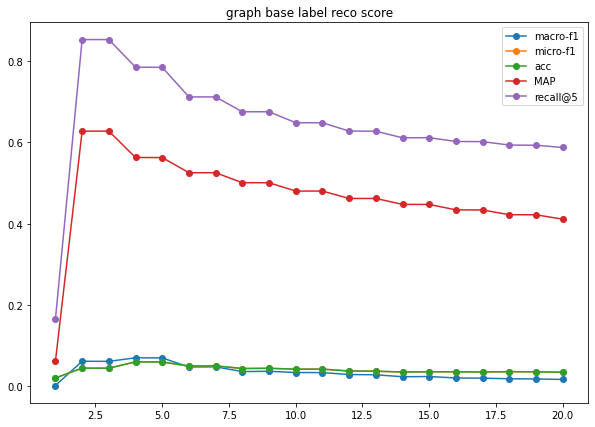

1 2
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.061724488147050595	micro_f1: 0.04472477064220184	acc: 0.04472477064220184	MAP: 0.6277437988447117	recall: 0.8529561671763507	recall_rank: 1.8571855392889154
depth:2	macro_f1: 0.06137614779242602	micro_f1: 0.0445973496432212	acc: 0.0445973496432212	MAP: 0.6277119435949665	recall: 0.8529561671763507	recall_rank: 1.8574843143113235
depth:3	macro_f1: 0.057448647736132376	micro_f1: 0.05122324159021407	acc: 0.05122324159021407	MAP: 0.5882156812776053	recall: 0.814729867482161	recall_rank: 1.9385361276196433
depth:4	macro_f1: 0.05733599327879655	micro_f1: 0.05109582059123344	acc: 0.05109582059123344	MAP: 0.588158341828064	recall: 0.8144750254841998	recall_rank: 1.9377346683354193
depth:5	macro_f1: 0.054532999719502394	micro_f1: 0.0485474006116208	acc: 0.04854740061162079	MAP: 0.573005861365

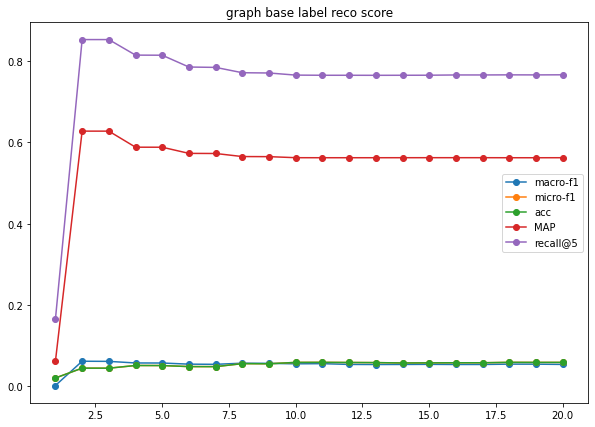

1 4
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.06172495143118064	micro_f1: 0.04472477064220184	acc: 0.04472477064220184	MAP: 0.6277437988447117	recall: 0.8529561671763507	recall_rank: 1.8571855392889154
depth:2	macro_f1: 0.060987031118031707	micro_f1: 0.04446992864424057	acc: 0.04446992864424057	MAP: 0.6276758409785888	recall: 0.85282874617737	recall_rank: 1.8570147915732855
depth:3	macro_f1: 0.06302832809996685	micro_f1: 0.045998980632008156	acc: 0.045998980632008156	MAP: 0.6157343696907882	recall: 0.8491335372069317	recall_rank: 1.8993097238895558
depth:4	macro_f1: 0.06342208869970353	micro_f1: 0.04638124362895005	acc: 0.046381243628950054	MAP: 0.6156940197077775	recall: 0.8492609582059123	recall_rank: 1.9002250562640661
depth:5	macro_f1: 0.06411641730172715	micro_f1: 0.046763506625891946	acc: 0.046763506625891946	MAP: 0.613859

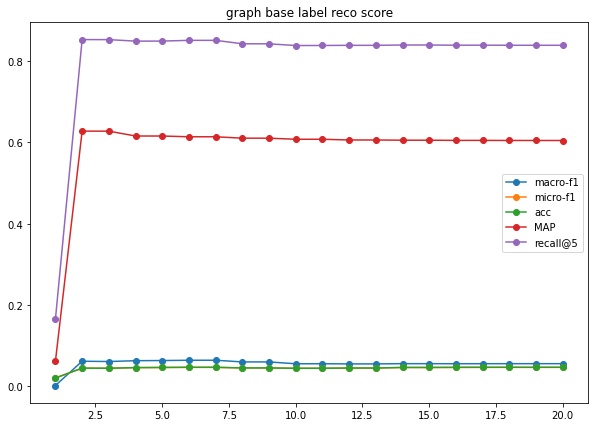

1 8
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.06171513407991378	micro_f1: 0.04472477064220184	acc: 0.04472477064220184	MAP: 0.6277437988447117	recall: 0.8529561671763507	recall_rank: 1.8571855392889154
depth:2	macro_f1: 0.06103253215579886	micro_f1: 0.04434250764525994	acc: 0.04434250764525994	MAP: 0.6278499830105289	recall: 0.8530835881753313	recall_rank: 1.8573562359970126
depth:3	macro_f1: 0.06135243134060422	micro_f1: 0.04446992864424057	acc: 0.04446992864424057	MAP: 0.6229973666326836	recall: 0.8532110091743119	recall_rank: 1.8733572281959379
depth:4	macro_f1: 0.0611624439339017	micro_f1: 0.04434250764525994	acc: 0.04434250764525994	MAP: 0.6229718824328875	recall: 0.8530835881753313	recall_rank: 1.872890216579537
depth:5	macro_f1: 0.061016304932282196	micro_f1: 0.04434250764525994	acc: 0.04434250764525994	MAP: 0.62108180428

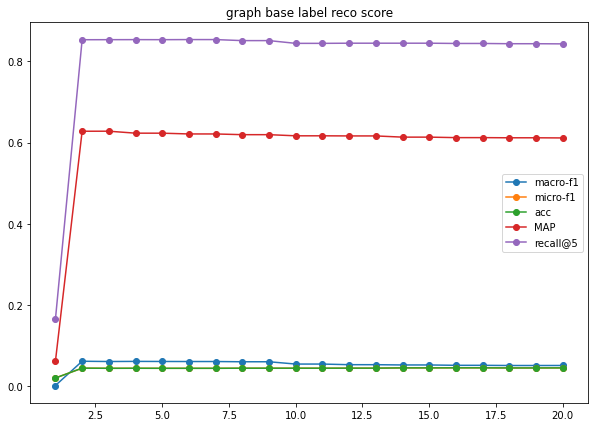

2 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.06053409045601958	micro_f1: 0.04421508664627931	acc: 0.04421508664627931	MAP: 0.6276036357458331	recall: 0.85282874617737	recall_rank: 1.8567159719109518
depth:2	macro_f1: 0.060980367608093354	micro_f1: 0.04434250764525994	acc: 0.04434250764525994	MAP: 0.627745922528028	recall: 0.8529561671763507	recall_rank: 1.8568867642665072
depth:3	macro_f1: 0.06773300479483871	micro_f1: 0.060142711518858305	acc: 0.060142711518858305	MAP: 0.5492460924226971	recall: 0.7672018348623854	recall_rank: 2.0004982561036373
depth:4	macro_f1: 0.06712539566080174	micro_f1: 0.059760448521916414	acc: 0.059760448521916414	MAP: 0.5491908766564721	recall: 0.766946992864424	recall_rank: 1.9995015783352716
depth:5	macro_f1: 0.03840518976998199	micro_f1: 0.05135066258919469	acc: 0.0513506625891947	MAP: 0.5018391097

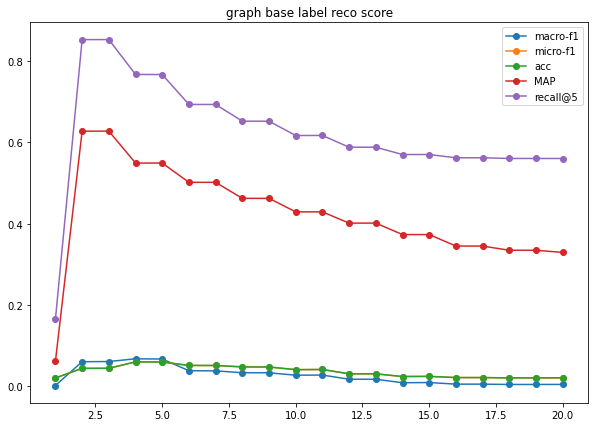

4 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.06084810999286179	micro_f1: 0.04421508664627931	acc: 0.04421508664627931	MAP: 0.627758664627926	recall: 0.8529561671763507	recall_rank: 1.8565879892440993
depth:2	macro_f1: 0.06123069129772678	micro_f1: 0.04446992864424057	acc: 0.04446992864424057	MAP: 0.6277671593611915	recall: 0.8529561671763507	recall_rank: 1.8571855392889154
depth:3	macro_f1: 0.06657372417024925	micro_f1: 0.0605249745158002	acc: 0.0605249745158002	MAP: 0.5443212708120956	recall: 0.7614678899082569	recall_rank: 2.0058567603748325
depth:4	macro_f1: 0.06677705145275528	micro_f1: 0.060652395514780834	acc: 0.060652395514780834	MAP: 0.5443467550118917	recall: 0.7615953109072375	recall_rank: 2.006357704534047
depth:5	macro_f1: 0.03966275259890736	micro_f1: 0.053261977573904176	acc: 0.053261977573904176	MAP: 0.4943425076

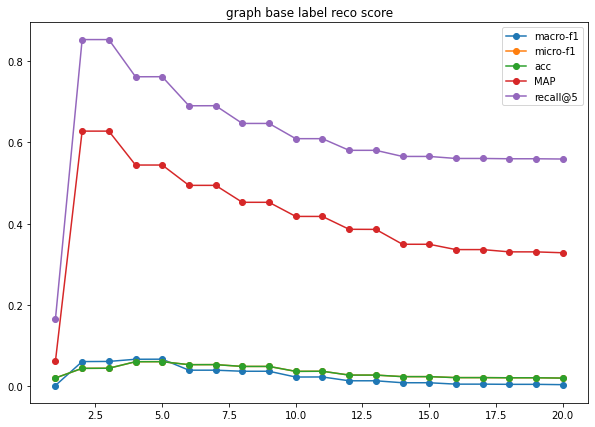

8 1
depth:0	macro_f1: 0.0020102384817080785	micro_f1: 0.020514780835881753	acc: 0.020514780835881753	MAP: 0.061901121304790654	recall: 0.16539245667686034	recall_rank: 3.399075500770416
depth:1	macro_f1: 0.06097257369112456	micro_f1: 0.04434250764525994	acc: 0.04434250764525994	MAP: 0.6278308698606818	recall: 0.8530835881753313	recall_rank: 1.8573562359970126
depth:2	macro_f1: 0.06103594717435255	micro_f1: 0.04434250764525994	acc: 0.04434250764525994	MAP: 0.6278160040774674	recall: 0.8529561671763507	recall_rank: 1.8567373767553033
depth:3	macro_f1: 0.06769517002907065	micro_f1: 0.06077981651376147	acc: 0.06077981651376147	MAP: 0.5434165817193332	recall: 0.7605759429153924	recall_rank: 2.007036354498241
depth:4	macro_f1: 0.06776045447524748	micro_f1: 0.0609072375127421	acc: 0.0609072375127421	MAP: 0.5434102106693841	recall: 0.7605759429153924	recall_rank: 2.007203886748199
depth:5	macro_f1: 0.038771866532253445	micro_f1: 0.05389908256880735	acc: 0.05389908256880734	MAP: 0.4921338769962

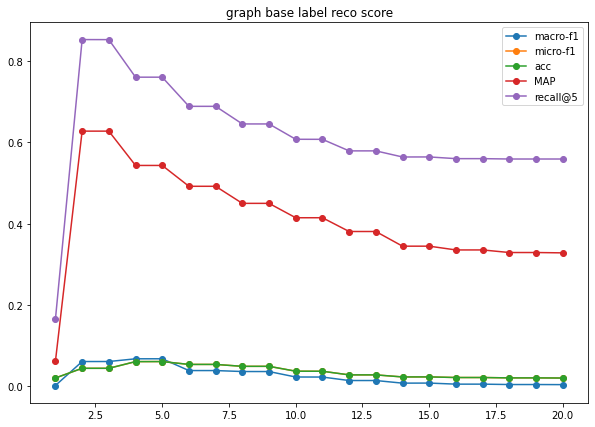

In [53]:
macro_f1_dict = {}
micro_f1_dict = {}
acc_dict = {}
MAP_dict = {}
recall5_dict = {}
recall_rank_dict = {}

for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]:
    print(w1, w2)
    adj_matrix = np.hstack([np.zeros((recipe_num, recipe_num)), w1*train_features, w2*train_labels])
    temp_matrix = np.hstack([w1*train_features.T, np.zeros((ingred_num, ingred_num)), np.zeros((ingred_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    temp_matrix = np.hstack([w2*train_labels.T, np.zeros((label_num, ingred_num)), np.zeros((label_num, label_num))])
    adj_matrix = np.vstack([adj_matrix, temp_matrix])
    adj_matrix = csr_matrix(adj_matrix)
    
    query_num, _ = valid_features.shape
    score_matrix = csr_matrix(np.hstack([np.zeros((query_num, recipe_num)), valid_features, np.zeros((query_num, label_num))]))
    src_matrix = score_matrix.copy()
    
    score_matrix = normalize(score_matrix, axis=1, norm='l1')
    exist_idx = score_matrix > 0
    
    macro_f1_lst = []
    micro_f1_lst = []
    acc_lst = []
    MAP_lst = []
    recall5_lst = []
    recall_rank_lst = []
    
    for k in range(depth):
        # start node의 누적 점수 * 인접행렬 -> next node에 더해질 값
        src_matrix = np.multiply(score_matrix.toarray(), src_matrix.toarray()) @ adj_matrix
        score_matrix = csr_matrix(score_matrix + src_matrix)
        score_matrix = normalize(score_matrix, axis=1, norm='l1')
        # next_node의 score matrix
        src_matrix = score_matrix.toarray() * (src_matrix>0)
        src_recipe_matrix = topk_per_row(src_matrix[:, :recipe_num], recipe_threshold)
        src_ingred_matrix = topk_per_row(src_matrix[:, recipe_num:recipe_num+ingred_num], ingred_threshold)
        src_label_matrix = topk_per_row(src_matrix[:, recipe_num+ingred_num:], label_threshold)
        src_matrix = csr_matrix(np.hstack([src_recipe_matrix, src_ingred_matrix, src_label_matrix]))

        score_matrix_ = score_matrix.copy()
        score_matrix_[exist_idx] = 0

        label_recs = {}
        label_rec_idx_lst = np.argpartition(score_matrix_[:, recipe_num+ingred_num:].toarray(), -label_topk)[:,-label_topk:]
        top_recommends = label_rec_idx_lst[:,0].flatten()

        MAP = 0
        recall5 = 0
        recall_rank = 0

        for query, label_rec_idx in enumerate(label_rec_idx_lst):
            label_recs[query] = []

            for idx in label_rec_idx:
                label_recs[query].append((idx, score_matrix_[query, recipe_num + ingred_num + idx]))

            label_recs[query].sort(key=lambda x : x[1], reverse=True)

            for j, rec in enumerate(label_recs[query]):
                idx, _ = rec
                if answer[query] == idx:
                    MAP += 1/(j+1)
                    recall5 += 1
                    recall_rank += j+1

        MAP = MAP / len(label_rec_idx_lst)
        if recall5 != 0:
            recall_rank_avg = recall_rank / recall5
        else:
            recall_rank_avg = 0
        recall5 = recall5/len(label_rec_idx_lst)

        MAP_lst.append(MAP)
        recall5_lst.append(recall5)
        recall_rank_lst.append(recall_rank_avg)

        macro_f1 = f1_score(answer, top_recommends, average='macro')
        micro_f1 = f1_score(answer, top_recommends, average='micro')
        accuracy = accuracy_score(answer, top_recommends)
        macro_f1_lst.append(macro_f1)
        micro_f1_lst.append(micro_f1)
        acc_lst.append(accuracy)
        if k % 1 == 0:
            print("depth:{}\tmacro_f1: {}\tmicro_f1: {}\tacc: {}\tMAP: {}\trecall: {}\trecall_rank: {}".format(k, macro_f1, micro_f1, accuracy, MAP, recall5, recall_rank_avg))
            with open("./recs/Graph_rec_clf_{}_{}_depth_{}.pickle".format(w1,w2,k), 'wb') as f:
                pickle.dump(label_recs, f)
                
    macro_f1_dict[w1/w2] = macro_f1_lst
    micro_f1_dict[w1/w2] = micro_f1_lst
    acc_dict[w1/w2] = acc_lst
    MAP_dict[w1/w2] = MAP_lst
    recall5_dict[w1/w2] = recall5_lst
    recall_rank_dict[w1/w2] = recall_rank_lst
    
    depth_lst = [i for i in range(1, depth+1)]

    plt.figure(figsize=(10,7))
    plt.plot(depth_lst, macro_f1_lst, 'o-', label='macro-f1')
    plt.plot(depth_lst, micro_f1_lst, 'o-', label='micro-f1')
    plt.plot(depth_lst, acc_lst, 'o-', label='acc')
    plt.plot(depth_lst, MAP_lst, 'o-', label='MAP')
    plt.plot(depth_lst, recall5_lst, 'o-', label='recall@5')
    plt.title("graph base label reco score")
    plt.legend()
    plt.savefig('./data_analysis/graph_clf_scores_{}_{}.png'.format(w1,w2), dpi=100)
    plt.show()

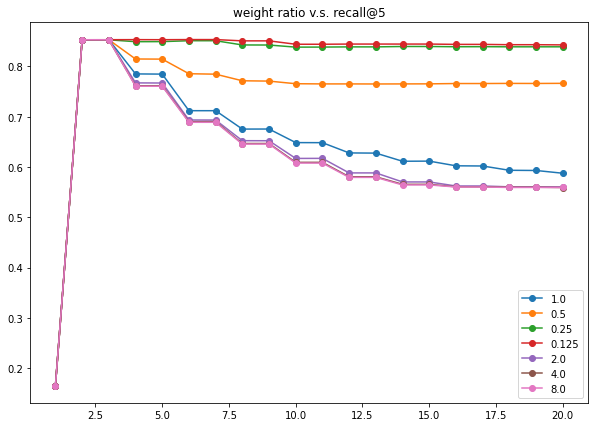

In [54]:
ratio_lst = [w1/w2 for w1, w2 in [(1,1), (1,2), (1,4), (1,8), (2,1), (4,1), (8,1)]]

plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall5_dict[ratio], 'o-', label=str(ratio))
plt.title("weight ratio v.s. recall@5")
plt.legend()
plt.savefig('./data_analysis/graph_clf_recall5_{}.png'.format(ratio), dpi=100)
plt.show()

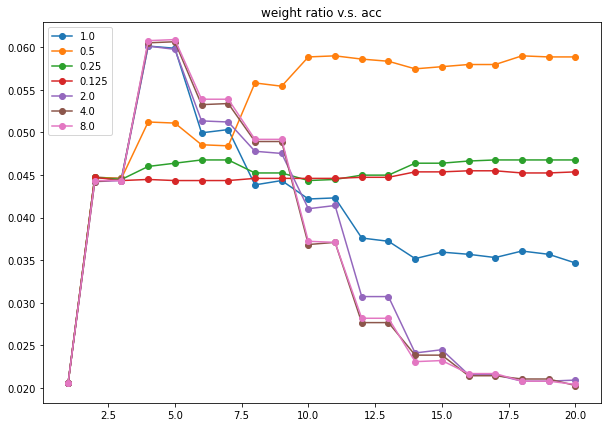

In [55]:
plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, acc_dict[ratio], 'o-', label=str(ratio))
plt.title("weight ratio v.s. acc")
plt.legend()
plt.savefig('./data_analysis/graph_clf_acc_{}.png'.format(ratio), dpi=100)
plt.show()

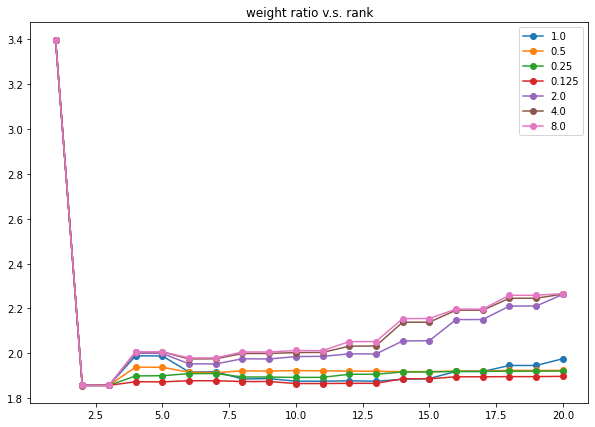

In [56]:
plt.figure(figsize=(10,7))
for ratio in ratio_lst:
    plt.plot(depth_lst, recall_rank_dict[ratio], 'o-', label=str(ratio))
plt.title("weight ratio v.s. rank")
plt.legend()
plt.savefig('./data_analysis/graph_clf_recall_rank_{}.png'.format(ratio), dpi=100)
plt.show()

Text(0.5, 1.0, 'graph base reco score')

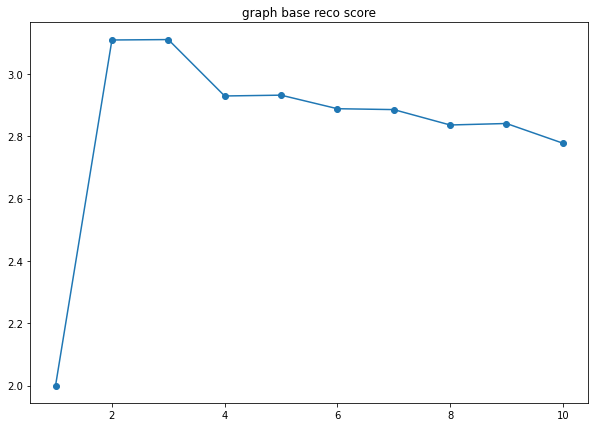

In [1]:
macro_f1_dict

NameError: name 'macro_f1_dict' is not defined